In [1]:
%cd ..


/Users/eliaweiss/ai/segmentation/MobileSAM


In [2]:
import numpy as np
from tblDetect.TableDetect import TableDetect
from tblDetect.MobileSamBoxes import MobileSamBoxes
import matplotlib.pyplot as plt
from PIL import Image
from notebooks.Utils import plot_results, \
    plot_rotatedResult, \
        applyRotatedResult , \
        plot_annotations 
from tblDetect.AlignTable_Processor import AlignTable_Processor
from tblDetect.TblStructureDetect import TblStructureDetect
import cv2
import time
from lineVision.LineCvUtils import LineCvUtils



/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with tinyvit.tiny_vit.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with tinyvit.tiny_vit.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_21m_224 in registry with tinyvit.tiny_vit.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: U

In [3]:
# init detectors
tblDec = TableDetect()
sam = MobileSamBoxes()
tblStructDetect = TblStructureDetect()       

checkpoint_load_scucess


In [4]:
file_list = ["/Users/eliaweiss/Documents/doc2txt/invoices 2/expense (6).jpeg", 
              "/Users/eliaweiss/Documents/doc2txt/sihach/attachments/img/20231025012642_001.jpg",
              "/Users/eliaweiss/Documents/doc2txt/sihach/need fix/4e7d4235deff4ee2b72d886e12ad0bcf.jpg"]

In [5]:
import os
folder = "/Users/eliaweiss/Documents/doc2txt/lineCv/1"
# folder = "/Users/eliaweiss/Documents/doc2txt/sihach/Invoices/3/img3"
file_list = os.listdir(folder)
file_list = [file for file in file_list if 
             ".jpg" in file 
             or ".png" in file 
             or ".jpeg" in file]
file_list = sorted(file_list, key=lambda x: int(
    os.path.splitext(os.path.basename(x))[0]))


In [6]:
fileIter = iter(file_list)
cc = 0

In [7]:
# IMAGE_SIZE = 1500
# while True:
#     file_path = next(fileIter)
#     cc+=1    
#     if cc < 1:
#         continue
#     print(cc)
    
#     file_path = os.path.join(folder, file_path)
#     print(file_path)

#     img = cv2.imread(file_path)
#     img = LineCvUtils.resize_keep_ratio(img, IMAGE_SIZE)

#     img_pil = Image.fromarray(img)
#     start = time.time()
    
#     # detect table
#     probas, boxes = tblDec.detectTables(img_pil)
#     if len(boxes):
#         # find table mask
#         anns = sam.process(img_pil,boxes)
#     else:
#         print("no tbl found!")
#         anns = []
    

 
#     for ann, box, prob in zip(anns, boxes,probas):
#         tmpImg = np.array(img_pil)    
#         print("prob: ",f"{prob:.2}")
#         alignTable_processor = AlignTable_Processor(img_pil, annotation=ann, tblBox=box)
#         tbl_patch_pil = alignTable_processor.getAlignTable()
#         cells = tblStructDetect.detectTableStructure(tbl_patch_pil)
#         rotated_cells =  alignTable_processor.unRotateAllCell(cells)
#         print("------ total time: (s): %s" % round(time.time() - start, 2))
    
#         applyRotatedResult(tmpImg, rotated_cells)
        
#         cv2.imshow("tmpImg",tmpImg)
#         cv2.waitKey()
#     # break

In [8]:
fileIter = iter(file_list)
cc = 0

In [9]:
# IMAGE_SIZE = 2000
# while True:
#     file_path = next(fileIter)
#     if cc < 0:
#         cc+=1    
#         continue
#     cc+=1    
    
#     print(cc)
    
#     file_path = os.path.join(folder, file_path)
#     print(file_path)

#     img = cv2.imread(file_path)
#     img = LineCvUtils.resize_keep_ratio(img, IMAGE_SIZE)
#     img_pil = Image.fromarray(img)
#     # img_pil = Image.open(file_path).convert("RGB")
#     print("img_pil size", img_pil.size)
#     start = time.time()
    
#     # detect table
#     probas, boxes = tblDec.detectTables(img_pil)
 
#     for prob, box in zip(probas, boxes):
#         tmpImg = np.array(img_pil)    
#         print("prob: ",f"{prob:.2}")
#         l,b,r,t = box
#         cv2.rectangle(tmpImg,(l,t),(r,b),(0,0,255),2)
        
#         cv2.imshow("tmpImg",tmpImg)
#         cv2.waitKey()
#     # break

In [14]:
from flaskUtil.FlaskUtil import FlaskUtil

fileIter = iter(file_list)
cc = 0
IMAGE_SIZE = 1500
while True:
    file_path = next(fileIter)
    if cc < 0:
        cc+=1    
        continue
    cc+=1    
    
    print(cc)
    
    file_path = os.path.join(folder, file_path)
    print(file_path)

    img = cv2.imread(file_path)
    img = LineCvUtils.resize_keep_ratio(img, IMAGE_SIZE)
    img_pil = Image.fromarray(img)
    # img_pil = Image.open(file_path).convert("RGB")
    print("img_pil size", img_pil.size)
    start = time.time()
    
    # detect table
    probas, boxes = tblDec.detectTables(img_pil)
    img_pil_for_sam = img_pil.copy()
    boxes_for_sam= boxes
    # img_pil_for_sam.thumbnail((1000,1000))
    # boxes_for_sam = [FlaskUtil.resizeBox(bb, img_pil_for_sam.size, img_pil.size) for bb in boxes]
    start = time.time()
    anns = sam.process(img_pil_for_sam,boxes_for_sam)
    print("------ sam.process: (s): %s" % round(time.time() - start, 2))
    
    for cc, (ann, box, prob) in enumerate(zip(anns, boxes,probas)):
        alignTable_processor = AlignTable_Processor(img_pil_for_sam, annotation=ann, tblBox=box, origSize= img_pil.size)
        boxes[cc] = alignTable_processor.getCropBBox()    
 
    for prob, box in zip(probas, boxes):
        tmpImg = np.array(img_pil)    
        print("prob: ",f"{prob:.2}")
        l,b,r,t = box
        cv2.rectangle(tmpImg,(l,t),(r,b),(0,0,255),2)
        
        cv2.imshow("tmpImg",tmpImg)
        cv2.waitKey()
    # break

1
/Users/eliaweiss/Documents/doc2txt/lineCv/1/0.jpg
img_pil size (1125, 1500)
------ sam.process: (s): 1.83
prob:  0.11
1
/Users/eliaweiss/Documents/doc2txt/lineCv/1/1.jpg
img_pil size (1108, 1500)
------ sam.process: (s): 1.84
prob:  0.89
prob:  0.22
2
/Users/eliaweiss/Documents/doc2txt/lineCv/1/2.jpg
img_pil size (1059, 1500)
------ sam.process: (s): 1.74
prob:  0.97
1
/Users/eliaweiss/Documents/doc2txt/lineCv/1/4.jpg
img_pil size (1125, 1500)
------ sam.process: (s): 1.81
prob:  0.28
prob:  0.19
2
/Users/eliaweiss/Documents/doc2txt/lineCv/1/5.jpg
img_pil size (959, 1500)
------ sam.process: (s): 1.77
prob:  0.99
prob:  0.99
2
/Users/eliaweiss/Documents/doc2txt/lineCv/1/6.jpg
img_pil size (1159, 1500)


In [ ]:
file_path = "0449e9f8-14b9-4a28-ba9e-cc6c35f8f9aa.jpg"
img = cv2.imread(file_path)
img = LineCvUtils.resize_keep_ratio(img, 1500)
img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img_pil = Image.open(file_path)
print("img_pil size", img_pil.size)
start = time.time()

# detect table
probas, boxes = tblDec.detectTables(img_pil)

for prob, box in zip(probas, boxes):
    tmpImg = img.copy() 
    print("prob: ",f"{prob:.2}")
    l,b,r,t = box
    cv2.rectangle(tmpImg,(l,t),(r,b),(0,0,255),2)
    
    cv2.imshow("tmpImg",tmpImg)
    cv2.waitKey()

[ WARN:0@14.960] global loadsave.cpp:248 findDecoder imread_('0449e9f8-14b9-4a28-ba9e-cc6c35f8f9aa.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
probas, boxes = tblDec.detectTables(img_pil)

In [ ]:
tbl_patch_pil = alignTable_processor.getAlignTable()

In [ ]:
box


[145, 611, 1042, 1149]

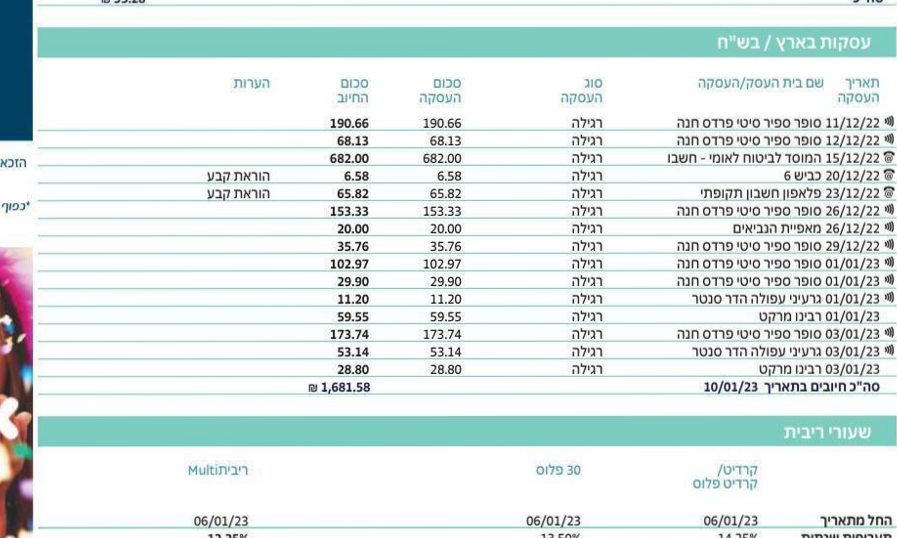

In [ ]:
alignTable_processor.getAlignTable()

In [ ]:
alignTable_processor.angle

0.04576928504679438

In [ ]:
[len(l) for l in alignTable_processor.lines[:5]]

[204, 204, 204, 204, 204]

In [ ]:
for line in  alignTable_processor.lines[:5]:
    slope = alignTable_processor.find_approximate_line(line)
    angle = alignTable_processor.calculate_angle(slope)
    print(slope, angle)

-9.840316065585807e-05 -0.005638085778130257
0.0016960529411878666 0.09717658218164402
0.000148313210361266 0.008497720937428914
-0.0004816560770649558 -0.027596858258561275
-0.00110780351779831 -0.0634724401345321


In [ ]:
def applyLineSegment(mask, line, color=255):
    for i, ls in enumerate(line):
        left, bottom, right, top = ls.boundingBox
        if ls.patch is not None:
            for y in range(bottom, top):
                for x in range(left, right):
                    if ls.patch[y-bottom, x-left] > 0:
                        mask[y, x] = color
        elif ls.patch is None:
            mask[bottom:top, left:right] = color

204 <class 'lineVision.lineCv.line.LineCv_ContourLine.LineCv_ContourLine'>


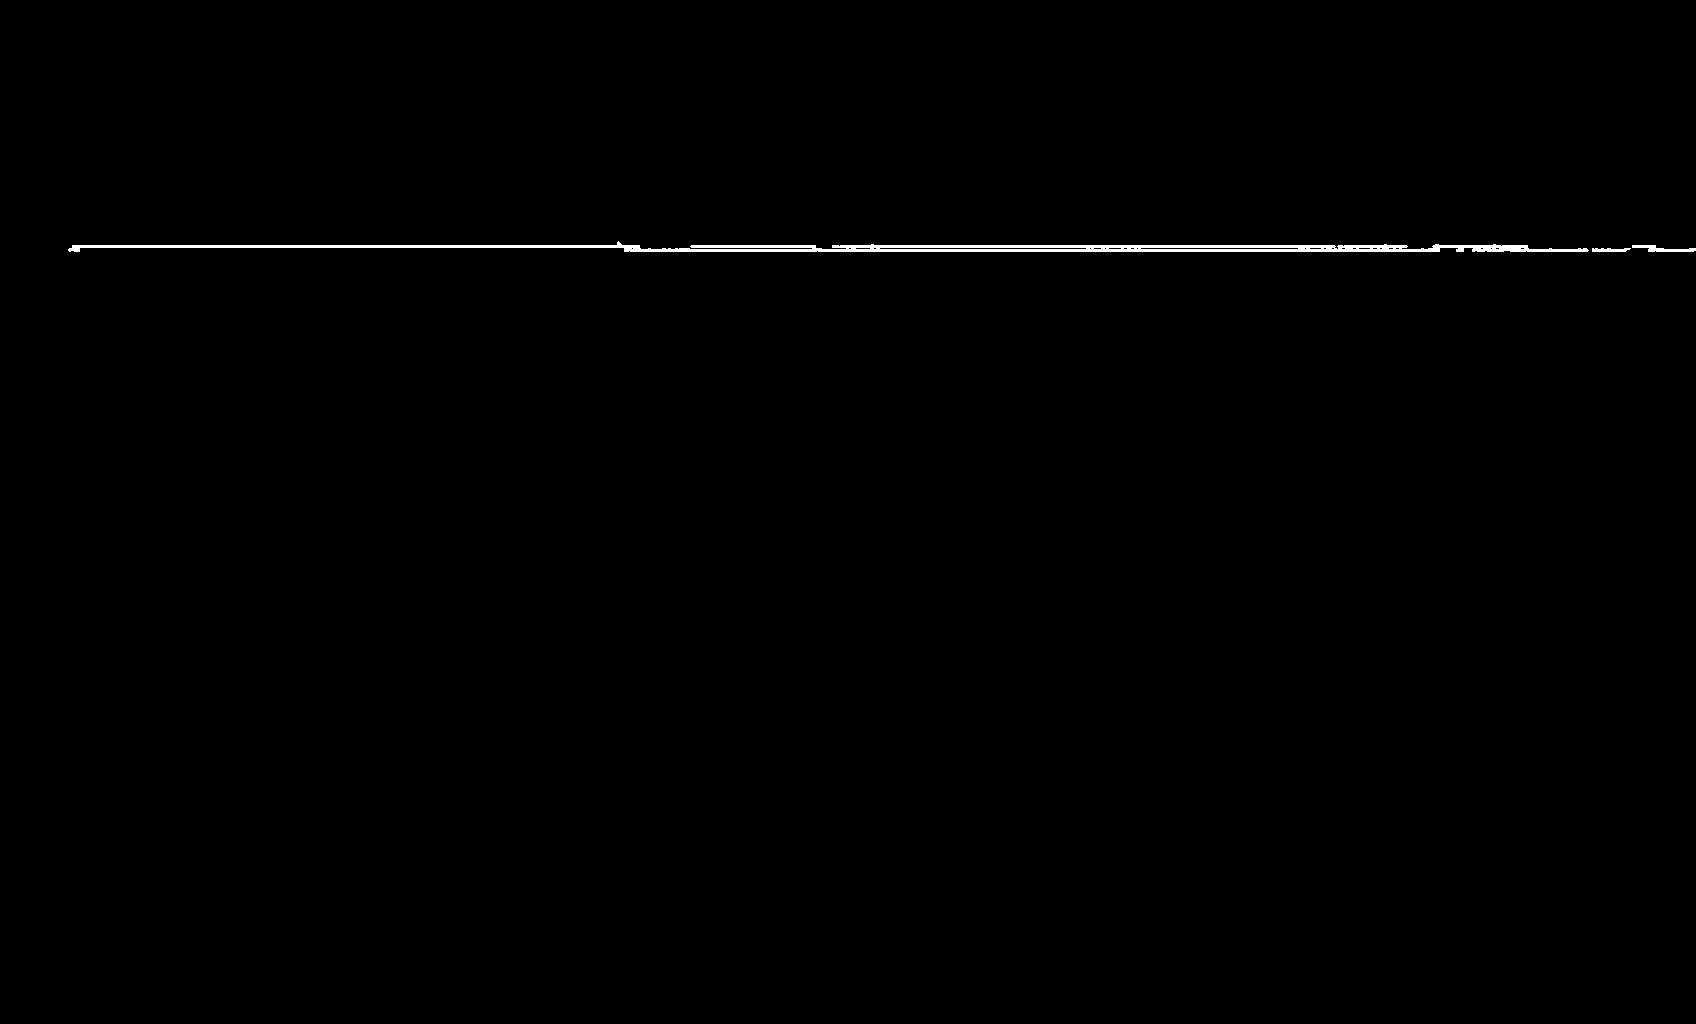

In [ ]:
mask = np.zeros(alignTable_processor.cvProcessor.imgZv.hog_shape, np.uint8)
for line in alignTable_processor.lines[1:2]:
    print(len(line), type(line.parentLine))
    applyLineSegment(mask, line, color=(255))
    
Image.fromarray(mask)  

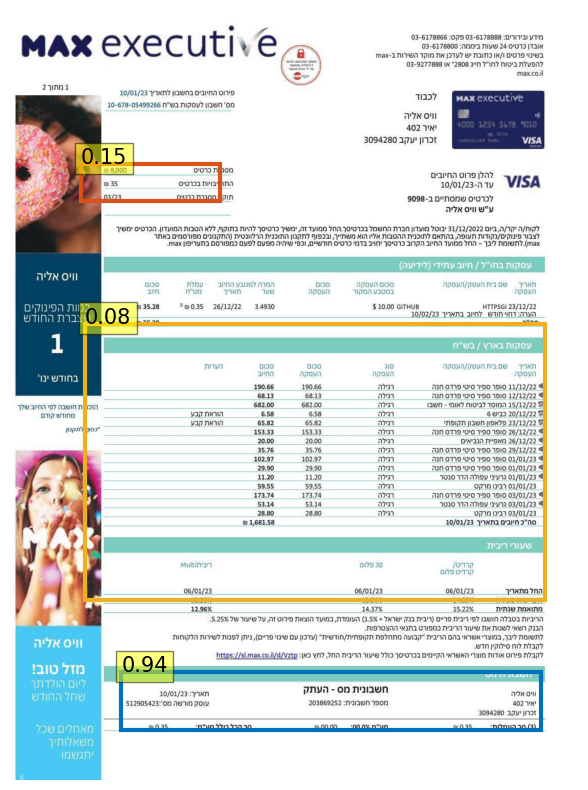

In [ ]:
# probas, boxes = tblDec.detectTables(img)

plot_results(tblDec.model, img_pil, probas, boxes)
